# Boxed EBUS
I wanted to make little plots of each basin with the EBUS boxed so people know where we're at.

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import cmocean
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import esmtools as et

/glade/u/home/rbrady/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


# Functions

In [13]:
def setup_map(ax):
    m = Basemap(projection='ortho',
                lon_0=-90, lat_0=0,
               resolution='c')
    m.fillcontinents(color='k')
#    m.drawparallels(np.arange(-90,120.,15.))
#    m.drawmeridians(np.arange(0.,360.,60.))
    m.drawmapboundary(fill_color='white')
    return m

In [3]:
colors = {
    'CalCS': '#5ea46d',
    'HumCS': '#9173c8',
    'CanCS': '#b78f3b',
    'BenCS': '#cd5664'
}

# Map

/glade/u/home/rbrady/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


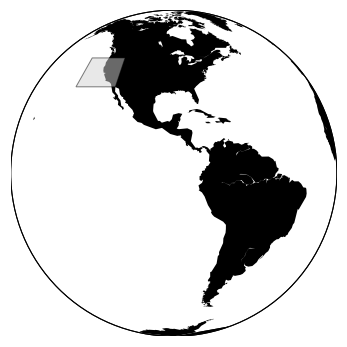

In [17]:
from matplotlib.patches import Polygon

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
m = setup_map(ax)

lon1,lon2,lat1,lat2 = et.ebus.visual_bounds('CalCS', std_lon=True)
x1,y1 = m(lon1, lat1)
x2,y2 = m(lon1, lat2)
x3,y3 = m(lon2, lat2)
x4,y4 = m(lon2, lat1)
poly = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)],facecolor='#d3d3d3',edgecolor='k',linewidth=1, alpha=0.5)
plt.gca().add_patch(poly)

# Save figure.
#et.vis.savefig('CalCS_minimap')

#plt.savefig('benguela_mini_map.png', transparent=True,
#          bbox_inches='tight', pad_inches=1, dpi=1000)